Clustering - Kmeans

c:\Users\Lusbe\Desktop\Programs\Python\CURSO\recursos\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


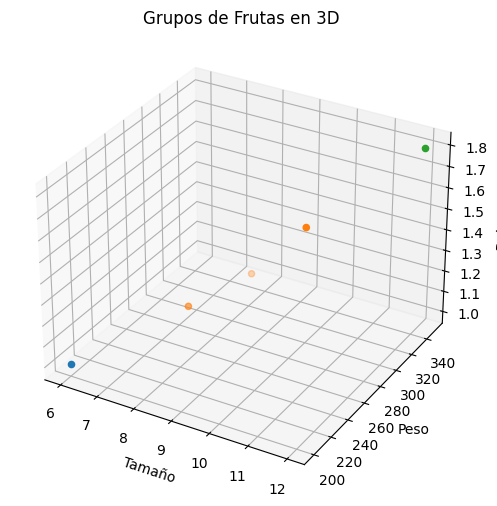

Nota de Silhouette: 0.2118


In [1]:
#######################################################################
#9-Cluster:

######################
#1-Saber los criterios
#2-Elegir el algoritmo de cluster a mis datos

# Importamos las herramientas que vamos a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans  # Esto es para hacer los grupos de frutas
from sklearn.preprocessing import StandardScaler  # Esto es para poner los datos en un formato especial
from sklearn.metrics import silhouette_score  # Esto nos ayuda a saber qué tan buenos son nuestros grupos
from mpl_toolkits.mplot3d import Axes3D 

#########################################
# Imagina que tenemos información sobre diferentes frutas, como su tamaño, peso, dulzura y color.

# Aquí guardamos esos datos en una "tabla" llamada DataFrame.
data = np.array([[10, 300, 1.5, 0.8],   # Tamaño, peso, dulzura, color
                 [8, 250, 1.2, 0.7],
                 [6, 200, 1.0, 0.6],
                 [12, 350, 1.8, 0.9],
                 [9, 280, 1.3, 0.75]])

#3- Creamos los nombres para las columnas
feature_names = ['Tamaño', 'Peso', 'Dulzura', 'Color']
#4- UNIR: Los nombre que lleva cada columnas y la matrix - Crear DATA FRAME
fruits_df = pd.DataFrame(data , columns=feature_names)

#5 - Prerar los datos - Escala los distintos valores para que puedan 

scaler = StandardScaler()
fruits_scaled = scaler.fit_transform(fruits_df)#Ponemos las frutas en la "caja"
#decidimos que queremos 2 grupos. Esto es como si lo clasificariamos
num_clusters = 3
#6- SEPERAR DATOS EN GRUPOS segun sus CARACTERISTICAS
    #AISLA LOS DATOS POR CARACTERISTICAS
    
#7- APLICAMOS LA MAQUINA
kmeans = KMeans(n_clusters = num_clusters)
fruits_df['grupo']= kmeans.fit_predict(fruits_scaled)

######################################
#8- Ahora vamos a ver cómo quedaron nuestros grupos en un dibujo.
# Imagina que dibujamos las frutas en un papel y les ponemos colores para cada grupo.
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

for grupo_id in range(num_clusters):
    grupo_data = fruits_df[fruits_df['grupo'] == grupo_id]
    #plt.scatter(grupo_data['Tamaño'], grupo_data['Peso'], label=f'Grupo {grupo_id}')
    ax.scatter(grupo_data['Tamaño'], grupo_data['Peso'], grupo_data['Dulzura'], label=f'Grupo {grupo_id}')

ax.set_xlabel('Tamaño')
ax.set_ylabel('Peso')
ax.set_zlabel('Dulzura')
plt.title('Grupos de Frutas en 3D')
plt.show()


# Queremos saber si nuestros grupos son buenos. Usamos una puntuación especial llamada "Silhouette Score".
# Imagina que es como ponerle una nota a nuestros grupos.
silhouette_avg = silhouette_score(fruits_scaled, fruits_df['grupo'])  # Calculamos la nota
print(f"Nota de Silhouette: {silhouette_avg:.4f}")    


































Clase 2 -Cluster de FRUTAS - Centroide - Kmeans - Knn- intro a las redes neuronales

In [ ]:
###############################################
#Centroide:
#El centroide es el elemento mas cercano
#a los objetos o puntos que deseamos agrupar.
#En este ejemplo podemos utilizar el Color

c:\Users\Lusbe\Desktop\Programs\Python\CURSO\recursos\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lusbe\Desktop\Programs\Python\CURSO\recursos\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lusbe\Desktop\Programs\Python\CURSO\recursos\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lusbe\Desktop\Programs\Python\CURSO\recursos\Lib\site-packages\sklearn\cluster\

TypeError: NearestNeighbors.__init__() got an unexpected keyword argument 'n_init'

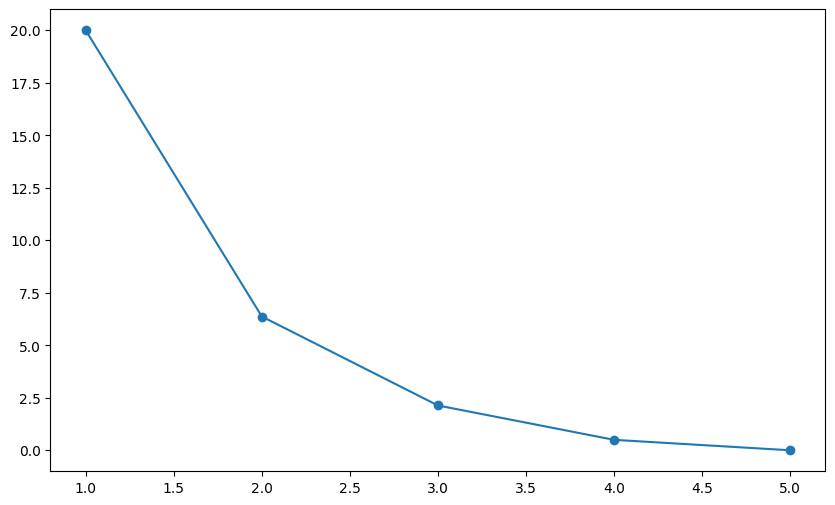

In [7]:
##############################################
# K-MEANS + CENTROIDE + KNN
# Importamos las herramientas que vamos a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans  # Esto es para hacer los grupos de frutas
from sklearn.preprocessing import StandardScaler  # Esto es para poner los datos en un formato especial
from sklearn.metrics import silhouette_score  # Esto nos ayuda a saber qué tan buenos son nuestros grupos
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.neighbors import NearestNeighbors

#########################################
# Imagina que tenemos información sobre diferentes frutas, como su tamaño, peso, dulzura y color.
#1 - CREAMOS LA TABLA
# Aquí guardamos esos datos en una "tabla" llamada DataFrame.
data = np.array([[10, 300, 1.5, 0.8],   # Tamaño, peso, dulzura, color
                 [8, 250, 1.2, 0.7],
                 [6, 200, 1.0, 0.6],
                 [12, 350, 1.8, 0.9],
                 [9, 280, 1.3, 0.75]])

#Creamos los nombres para las columnas
feature_names = ['Tamaño', 'Peso', 'Dulzura', 'Color']
#UNIR: Los nombre que lleva cada columnas y la matrix - Crear DATA FRAME
fruits_df = pd.DataFrame(data , columns=feature_names)# Combinamos 

#2- Preparamos los datos, LOS ESCALAMOS: el proceso de los datos SEAN IGUALES
escalador = StandardScaler()
frutas_escaladas= escalador.fit_transform(fruits_df)

###################################################
#3- AGRUPAMOS: con K-means EN CENTROIDES
# Que es agrupar?  Es poner cosas parecidas juntas
# Que es un punto central? Es como el jefe de un grupo
# Como lo aplicamos a frutas? Usamos K-Means para encontrar grupos

# Decidimos cuantos grupos queremos, como si dividieramos frutas por TAMANO Y PESO
numero_de_grupos = 2 

#################################
#4- AGRUPAMOS PERO BUSCANDO AL JEFE(el centroide):
agrupador_de_jefes = KMeans(n_clusters= numero_de_grupos , n_init=10)#Creamos un grupo de JEFES

#Decidimos que Fruta va en cada Grupo
frutas_df_final = pd.DataFrame(frutas_escaladas, columns=feature_names)  # Creamos un DataFrame para las frutas escaladas
frutas_df_final['grupo'] = agrupador_de_jefes.fit_predict(frutas_escaladas)  # Asignamos el grupo a cada fruta

####################################################
#5- SABER CON EL METODO CODO: Cuantos grupos son mejores
# Como sabemos cuantos grupos son mejores? USAMOS EL METODO CODO
##################
#Crear una lista donde guardaremos los numeros que probemos
posibles_grupos= range(1,6) #Probamos desde el 1 al 5

inercias = [] #Aca guardamos como de lejos estan los puntos de su "jefe"

for numero in posibles_grupos:
    agrupador = KMeans(n_clusters=numero)
    agrupador.fit(frutas_escaladas)
    inercias.append(agrupador.inertia_)
    
#############################################
#6- GRAFICAMOS para ver como cambia la INERCIA= 
plt.figure(figsize=(10,6))
plt.plot(posibles_grupos, inercias , marker ='o')

###################################################
#7 - Que vecinos son cercanos
# Que son los vecinos mas cercanos? Son puntos qe estan mas cercas uno de otro
# Como aplico esto en CODIGO ? Procedemos a ver que grutas estan CERCA UNA DE OTRAS
vecinos_cercanos = NearestNeighbors(n_neighbors=2 , n_init=10) 
vecinos_cercanos.fit(frutas_escaladas)
distancias, indices = vecinos_cercanos.kneighbors(frutas_escaladas)

##################################################
#8 - Verificar que grupos son BUENOS(De todos los grupos, cuales son de calida ?)
#Utilizamos el PUNTAJE DE SILUETA= silhoutte_score
#Frutas escaladas = frutas_escaladas
#Grupo de jefes= frutas_df_final

puntaje_silueta = silhouette_score(frutas_escaladas, frutas_df_final['grupo'])

#Imprimimos el resultado para saber si hicimos un buen trabajo
print(f"Nota de Silhouette: {puntaje_silueta:.4f}")




In [ ]:
###############################################
#K-MEANS + CENTROIDE